## Continental shelves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from os import walk
import pickle
from pathlib import Path
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.colors as colors

from os import walk  
import torch.nn.functional as F
import sys

module_path = Path().resolve().parents[1] / "src" / "preprocessing"

# Append the directory to sys.path
sys.path.append(str(module_path))


from makeTrainingFeatures import *


#your current directory
import os
currdir = os.getcwd()
#os.chdir(currdir)

/gxfs_home/cau/sunms498/.conda/envs/pytorch/lib/python3.11/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
# Define file paths
data_path = Path().resolve().parents[1] / 'data' / 'raw' / 'labels'
toc_labels_file = "toc_continentalshelves.csv"
lee_features_path = Path().resolve().parents[1] / 'data' / 'raw' / 'features' / 'FeaturesPhrampusLee_TOCSedRate_updated'
feature_selection_path = Path().resolve().parents[1] / 'data' / 'interim' / 'selectedFeatureLists' / 'selectedfeatures_v_men.txt'
save_path = Path().resolve().parents[1] / 'data' / 'interim' / 'inputfeatures' / 'SedTOCFeaturesnoNAN_TOC_CS_men_secondhalf'


In [3]:
# Read data
df = pd.read_csv(Path(data_path / toc_labels_file))
df = df[["Latitude", "Longitude", "TOC [%]"]]
df = df[df["Longitude"] > -180]
df = df.dropna(how="any")

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df_1_3, df_2_3 = train_test_split(df, test_size=2/3, random_state=21)

In [32]:
df_infogain_CS_second_half = pd.read_csv("preprocessed/infogain_CS_1_3_second_half.csv")

In [33]:
selected_columns = ['Latitude', 'Longitude', 'TOC [%]' ]
df_infogain_CS_second_half = df_infogain_CS_second_half[selected_columns]

In [6]:
df_2_3

,Latitude,Longitude,TOC [%]
3545,74.44400,166.065000,1.10000
58111,57.06842,4.573680,0.11573
10695,37.78000,120.084000,0.30000
12119,51.13333,1.949120,0.09146
11290,38.11464,122.208558,1.07210
...,...,...,...
30269,54.62281,5.915790,0.26109
40635,55.57719,5.945610,0.25841
71863,58.14211,10.568420,2.54077
87265,60.46842,1.650880,0.33427


In [35]:
df_infogain_CS_second_half

,Latitude,Longitude,TOC [%]
0,52.59474,2.72456,0.035957
1,53.87719,7.94386,0.096410
2,55.45789,6.95965,0.058870
3,55.36842,1.71053,0.163980
4,57.87368,-0.64561,0.262848
...,...,...,...
5730,53.96667,8.60000,0.148320
5731,57.03860,8.36140,0.061430
5732,57.21754,8.74912,0.064965
5733,55.57719,7.43684,0.030997


In [36]:
df_infogain_CS_second_half_2_3 = pd.concat([df_infogain_CS_second_half, df_2_3])

In [37]:
df_infogain_CS_second_half_2_3

,Latitude,Longitude,TOC [%]
0,52.594740,2.724560,0.035957
1,53.877190,7.943860,0.096410
2,55.457890,6.959650,0.058870
3,55.368420,1.710530,0.163980
4,57.873680,-0.645610,0.262848
...,...,...,...
56816,56.949120,8.003510,0.030500
8033,41.866667,-68.183333,1.000000
37421,55.278950,8.152630,0.074370
46084,56.054390,7.884210,0.175750


In [38]:
df

,Latitude,Longitude,TOC [%]
0,36.87500,-74.61330,1.60000
1,-15.83000,-38.77000,0.13000
2,-15.82000,-38.77000,1.70000
3,-16.02000,-38.62000,0.55000
4,-16.34000,-38.47000,0.34000
...,...,...,...
89433,60.97544,2.69474,0.30538
89434,60.97544,2.72456,0.32862
89435,60.97544,2.75439,0.35326
89436,60.97544,2.78421,0.39728


/tmp/ipykernel_1532248/3543943954.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/tmp/ipykernel_1532248/3543943954.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


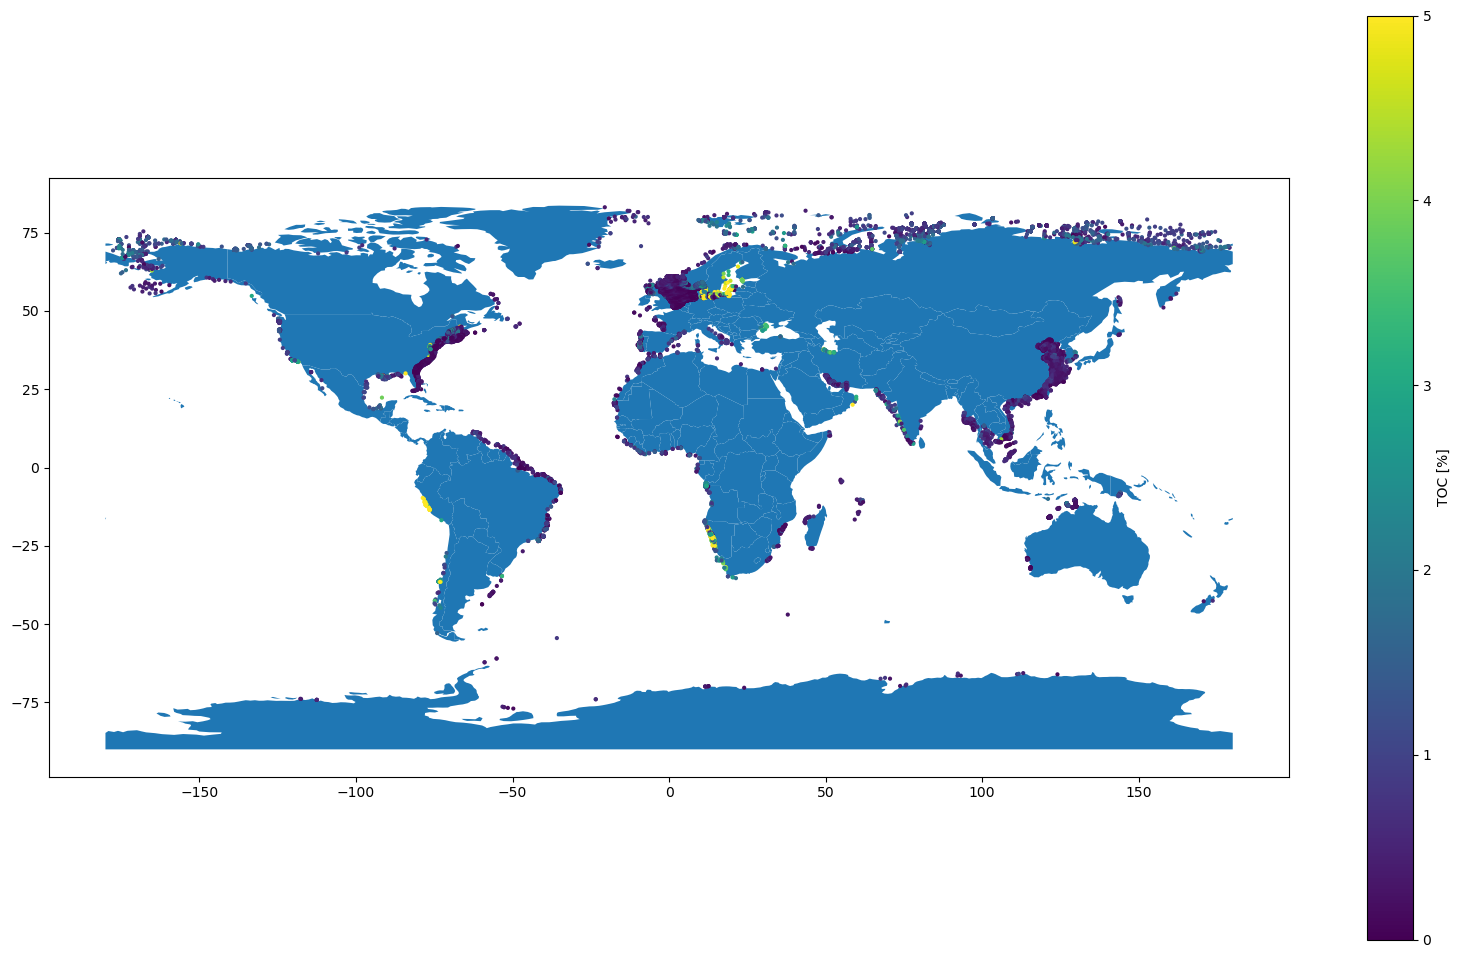

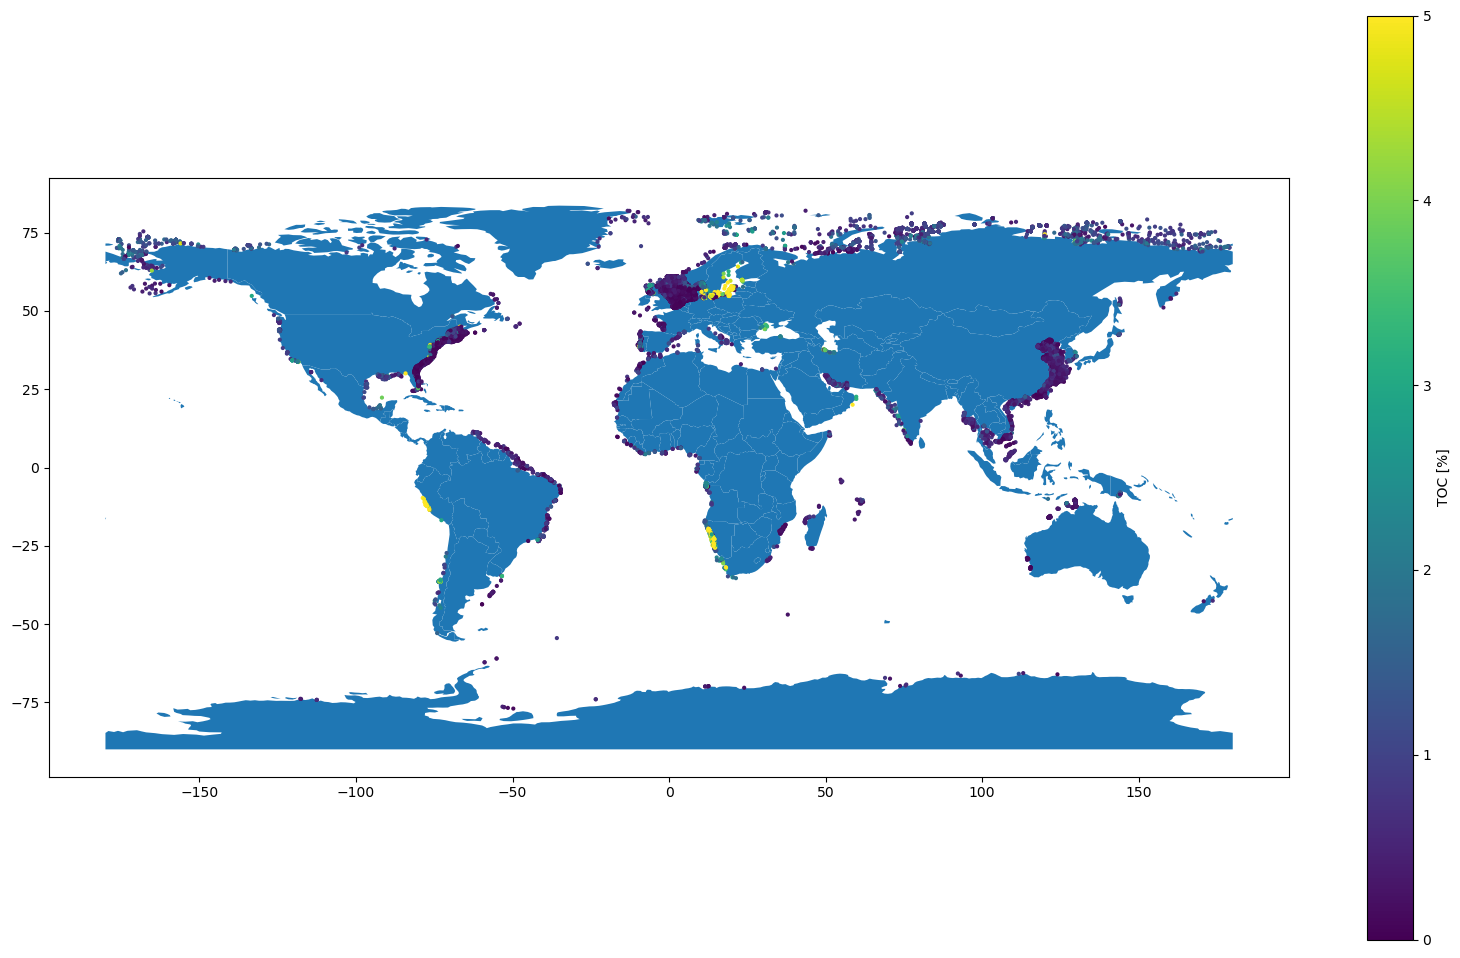

In [39]:
# Plot TOC on map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plot_toc_on_map(df, world)

# Plot TOC on map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plot_toc_on_map(df_infogain_CS_second_half_2_3, world)


In [40]:
# Select features
selected_files = select_features(lee_features_path, feature_selection_path)

Actual number of features
475
Selected number of features
139


In [41]:
# Process features
features, mean, std, lat_labels, lon_labels = process_features(lee_features_path, selected_files, df_infogain_CS_second_half_2_3)

file 0 :2N2_ocean_eot20_modified.nc done!
file 1 :ChlorSummerMean.nc done!
file 2 :ChlorWinterMean.nc done!
file 3 :DERIVATIVE_GL_ELEVATION_M_ASL_ETOPO2v2.5.nc done!
file 4 :DERIVATIVE_lithology_grain_size_Everardo_global_8.nc done!
file 5 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 6 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 7 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.5m.nc done!
file 8 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 9 :GL_DIST_TO_COAST_KM_ETOPO.5m.grd done!
file 10 :GL_DIST_TO_COAST_KM_ETOPO.r50km.men.5m.grd done!
file 11 :GL_ELEVATION_M_ASL_ETOPO2v2.5m.grd done!
file 12 :GL_ELEVATION_M_ASL_ETOPO2v2.r50km.men.5m.grd done!
file 13 :GL_ELEVATION_M_ASL_SRTM15+V2.5m.nc done!
file 14 :GL_HEATFLUX_MWM2_Becker.5m.nc done!
file 15 :GL_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 16 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.5m.grd done!
file 17 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.r50km.men.5m.grd done!
file 18 :GL_RIVERMOUTH_DOC_TGCYR-1_ORNL.5m.grd done!
file 

In [42]:
lat_labels = np.array( df_infogain_CS_second_half_2_3["Latitude"])
lon_labels = np.array( df_infogain_CS_second_half_2_3["Longitude"])
np.save(save_path / "numpy_lat", lat_labels)
np.save(save_path / "numpy_lon", lon_labels)

In [43]:
 df_infogain_CS_second_half_2_3.shape

(65361, 3)

In [44]:
df_1_3.shape

(29812, 3)

In [45]:
# Do PCA of features


In [46]:
# Save processed data
save_data(features, df_infogain_CS_second_half_2_3["TOC [%]"].values, mean, std, lat_labels, lon_labels, save_path)  

## Deep sea

In [4]:
data_path = Path().resolve().parents[1] / 'data' / 'raw' / 'labels'
toc_labels_file = "toc_deep.csv"
lee_features_path = Path().resolve().parents[1] / 'data' / 'raw' / 'features' / 'FeaturesPhrampusLee_TOCSedRate_updated'
feature_selection_path = Path().resolve().parents[1] / 'data' / 'interim' / 'selectedFeatureLists' / 'selectedfeatures_v_men.txt'
save_path = Path().resolve().parents[1] / 'data' / 'interim' / 'inputfeatures' / 'SedTOCFeaturesnoNAN_TOC_DO_men_secondhalf'

In [5]:
# Read data
df = pd.read_csv(Path(data_path / toc_labels_file))
df = df[["Latitude", "Longitude", "TOC [%]"]]
df = df[df["Longitude"] > -180]
df = df.dropna(how="any")

In [6]:
df

,Latitude,Longitude,TOC [%]
0,-28.331500,-20.941000,0.2000
1,-1.909700,-137.468700,0.1000
2,36.160000,20.480000,0.2000
3,36.160000,20.480000,0.3000
4,-1.197800,-11.878500,0.1900
...,...,...,...
13017,42.000000,-9.733333,1.2510
13018,41.999667,-10.501167,0.8835
13019,42.000000,-9.433333,1.4100
13020,42.000000,-9.466667,1.9900


/tmp/ipykernel_2723263/2266977445.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


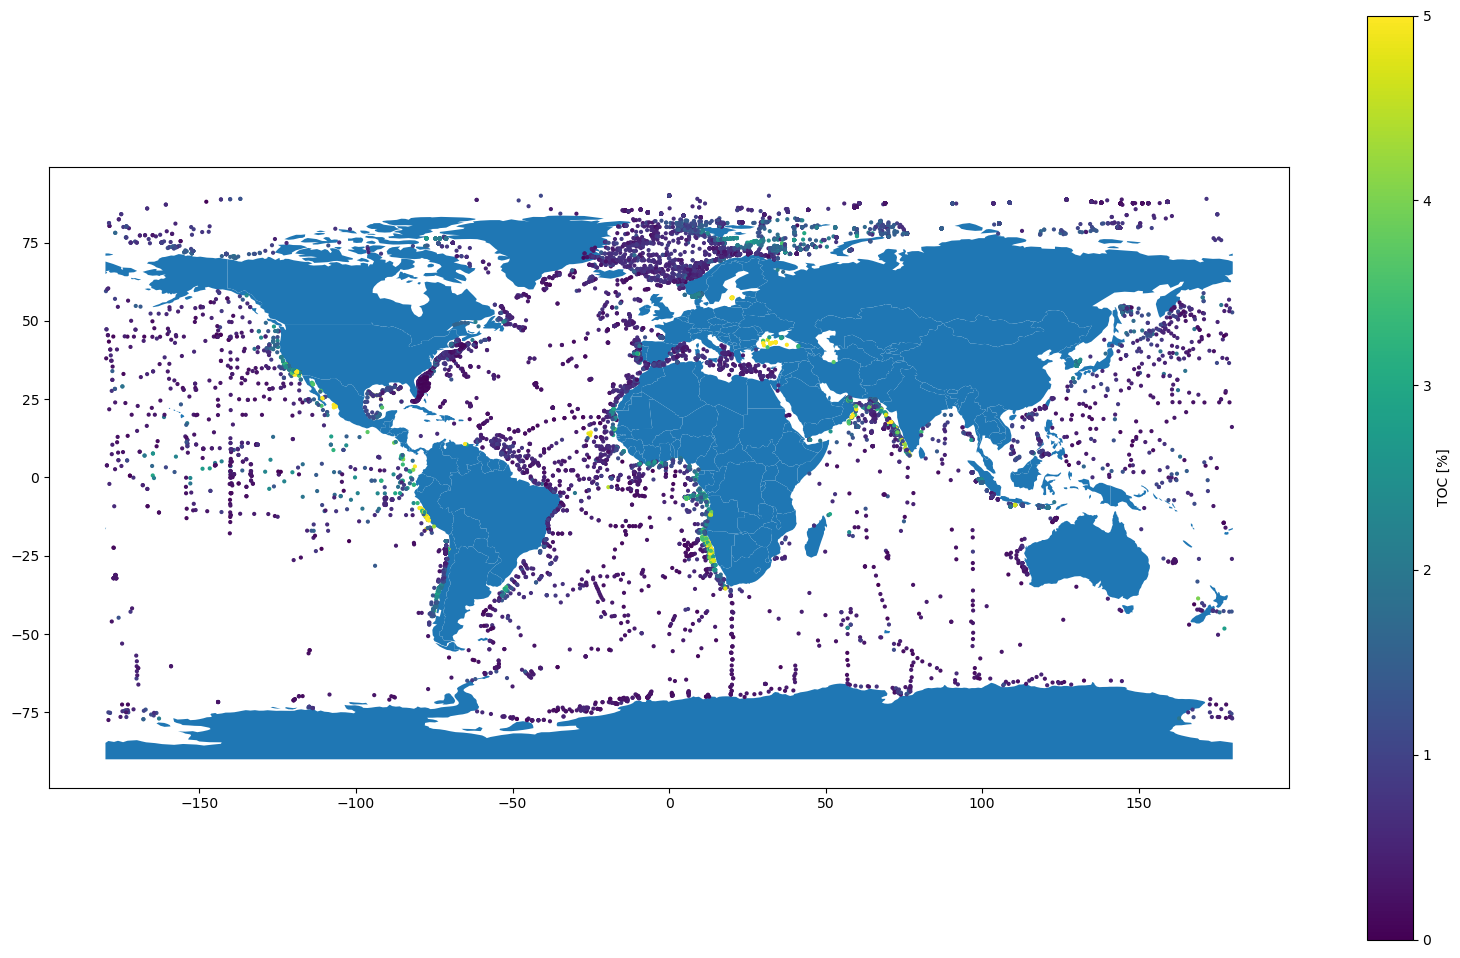

In [7]:
# Plot TOC on map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plot_toc_on_map(df, world)

In [8]:
# Select features
selected_files = select_features(lee_features_path, feature_selection_path)

Actual number of features
475
Selected number of features
139


In [9]:
# Process features
features, mean, std, lat_labels, lon_labels = process_features(lee_features_path, selected_files, df)

/gxfs_home/cau/sunms498/.conda/envs/pytorch/lib/python3.11/site-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


file 0 :2N2_ocean_eot20_modified.nc done!
file 1 :ChlorSummerMean.nc done!
file 2 :ChlorWinterMean.nc done!
file 3 :DERIVATIVE_GL_ELEVATION_M_ASL_ETOPO2v2.5.nc done!
file 4 :DERIVATIVE_lithology_grain_size_Everardo_global_8.nc done!
file 5 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 6 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 7 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.5m.nc done!
file 8 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 9 :GL_DIST_TO_COAST_KM_ETOPO.5m.grd done!
file 10 :GL_DIST_TO_COAST_KM_ETOPO.r50km.men.5m.grd done!
file 11 :GL_ELEVATION_M_ASL_ETOPO2v2.5m.grd done!
file 12 :GL_ELEVATION_M_ASL_ETOPO2v2.r50km.men.5m.grd done!
file 13 :GL_ELEVATION_M_ASL_SRTM15+V2.5m.nc done!
file 14 :GL_HEATFLUX_MWM2_Becker.5m.nc done!
file 15 :GL_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 16 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.5m.grd done!
file 17 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.r50km.men.5m.grd done!
file 18 :GL_RIVERMOUTH_DOC_TGCYR-1_ORNL.5m.grd done!
file 

In [10]:
lat_labels = np.array(df["Latitude"])
lon_labels = np.array(df["Longitude"])
np.save(save_path / "numpy_lat", lat_labels)
np.save(save_path / "numpy_lon", lon_labels)

In [11]:
# Save processed data
save_data(features, df["TOC [%]"].values, mean, std, lat_labels, lon_labels,  save_path)
    